# Brain MRI Data Setup Notebook

This notebook processes and analyzes a dataset of brain MRI scans for dementia classification. The dataset contains images across four categories:
- Mild Dementia
- Moderate Dementia
- Non-Demented
- Very Mild Dementia

## Prerequisites
- Python 3.7+
- Required packages: PIL, pandas, numpy, matplotlib
- Dataset structure should be:

        data/

        ├── mild_dementia/

        ├── moderate_dementia/

        ├── non_demented/

        └── very_mild_dementia/

In [1]:
# Import necessary libraries
import os
from pathlib import Path
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Configure paths
PROJECT_PATH = Path.cwd().parent
DATA_PATH = PROJECT_PATH / "data"

## Dataset Analysis Function

The `analyze_dataset()` function performs the following operations:
1. Verifies the existence of all required directories
2. Counts the number of images in each class
3. Provides summary statistics of the dataset distribution

### Returns:
- Dictionary with class names as keys and image counts as values

In [2]:
def analyze_dataset():
    """Analyze the existing dataset structure and provide statistics"""
    print("Verifying data structure...")
    print(f"Data Path: {DATA_PATH}")
    
    # Get dataset statistics
    class_counts = {}
    total_images = 0
    
    print("\nCounting files...")
    for class_name in ['mild_dementia', 'moderate_dementia', 
                      'non_demented', 'very_mild_dementia']:
        class_path = DATA_PATH / class_name
        if class_path.exists():
            num_images = len(list(class_path.glob('*.jpg')))
            class_counts[class_name] = num_images
            total_images += num_images
            print(f"Found {num_images:,} images in {class_name}")
        else:
            print(f"Warning: {class_name} directory not found at {class_path}")
    
    
    print("\nDataset Statistics:")
    print("-" * 50)
    for class_name, count in sorted(class_counts.items()):
        print(f"{class_name}: {count:,} images")
    print("-" * 50)
    print(f"Total images: {total_images:,}")
    
    return class_counts

## Image Verification Function

The `verify_images()` function ensures data quality by:
1. Attempting to open each image file
2. Verifying the image data is valid
3. Checking for zero-sized images
4. Reporting any corrupted or invalid files

### Error Handling:
- Records paths of problematic images
- Provides specific error messages for each failed verification
- Continues processing even if some images fail

In [3]:
def verify_images():
    """Verify all images can be opened and are valid"""
    invalid_images = []
    
    for class_name in ['mild_dementia', 'moderate_dementia', 
                      'non_demented', 'very_mild_dementia']:
        class_path = DATA_PATH / class_name
        if class_path.exists():
            print(f"\nChecking {class_name}...")
            for img_path in class_path.glob('*.jpg'):
                try:
                    with Image.open(img_path) as img:
                        img.verify() 
                        if img.size == (0, 0):
                            raise ValueError("Image has zero size")
                except Exception as e:
                    invalid_images.append((str(img_path), str(e)))
    
    if invalid_images:
        print("\nFound invalid images:")
        for path, error in invalid_images:
            print(f"- {path}: {error}")
    else:
        print("\nAll images verified successfully!")

## Sample Image Visualization

The `load_sample_images()` function creates a visual grid of sample images:
1. Displays a configurable number of samples per class
2. Organizes images in a 4×N grid (where N is samples_per_class)
3. Labels each image with its class and filename

### Parameters:
- samples_per_class (int, default=3): Number of images to display per class

In [4]:
def load_sample_images(samples_per_class=3):
    """Load and display sample images from each class"""
    plt.figure(figsize=(15, 10))
    plot_idx = 1
    
    for class_name in sorted(['mild_dementia', 'moderate_dementia', 
                            'non_demented', 'very_mild_dementia']):
        class_path = DATA_PATH / class_name
        if class_path.exists():
            image_files = list(class_path.glob('*.jpg'))[:samples_per_class]
            
            for img_path in image_files:
                plt.subplot(4, samples_per_class, plot_idx)
                img = Image.open(img_path)
                plt.imshow(img, cmap='gray')
                plt.title(f'{class_name}\n{img_path.name}', fontsize=8)
                plt.axis('off')
                plot_idx += 1
    
    plt.tight_layout()
    plt.show()

## Image Dimension Analysis

The `check_image_dimensions()` function analyzes image consistency:
1. Scans all images in the dataset
2. Records unique dimension combinations
3. Reports frequency of each dimension

### Returns:
- Dictionary with dimensions (width, height) as keys and counts as values

### Use Case:
This check is crucial for:
- Identifying inconsistent image sizes
- Planning preprocessing steps
- Ensuring compatibility with neural network input requirements

In [5]:
def check_image_dimensions():
    """Check if all images have consistent dimensions"""
    dimensions = {}
    
    for class_name in ['mild_dementia', 'moderate_dementia', 
                      'non_demented', 'very_mild_dementia']:
        class_path = DATA_PATH / class_name
        if class_path.exists():
            for img_path in class_path.glob('*.jpg'):
                with Image.open(img_path) as img:
                    dims = img.size
                    dimensions[dims] = dimensions.get(dims, 0) + 1
    
    print("\nFound image dimensions (width x height):")
    for dims, count in dimensions.items():
        print(f"{dims}: {count:,} images")
    
    return dimensions

## Execution Section

This section runs all analysis functions in sequence. Expected runtime varies with dataset size.

### Process Flow:
1. Dataset analysis (file counts)
2. Dimension verification
3. Image integrity checks
4. Sample visualization

### Outputs:
- Class distribution statistics
- Image dimension summary
- List of any corrupted files
- Visual grid of sample images

Starting data analysis...
Verifying data structure...
Data Path: /Users/bradrichardson/alzheimers-detection/data

Counting files...
Found 5,002 images in mild_dementia
Found 488 images in moderate_dementia
Found 67,222 images in non_demented
Found 13,725 images in very_mild_dementia

Dataset Statistics:
--------------------------------------------------
mild_dementia: 5,002 images
moderate_dementia: 488 images
non_demented: 67,222 images
very_mild_dementia: 13,725 images
--------------------------------------------------
Total images: 86,437

Checking image dimensions...

Found image dimensions (width x height):
(496, 248): 86,437 images

Verifying images...

Checking mild_dementia...

Checking moderate_dementia...

Checking non_demented...

Checking very_mild_dementia...

All images verified successfully!

Loading sample images...


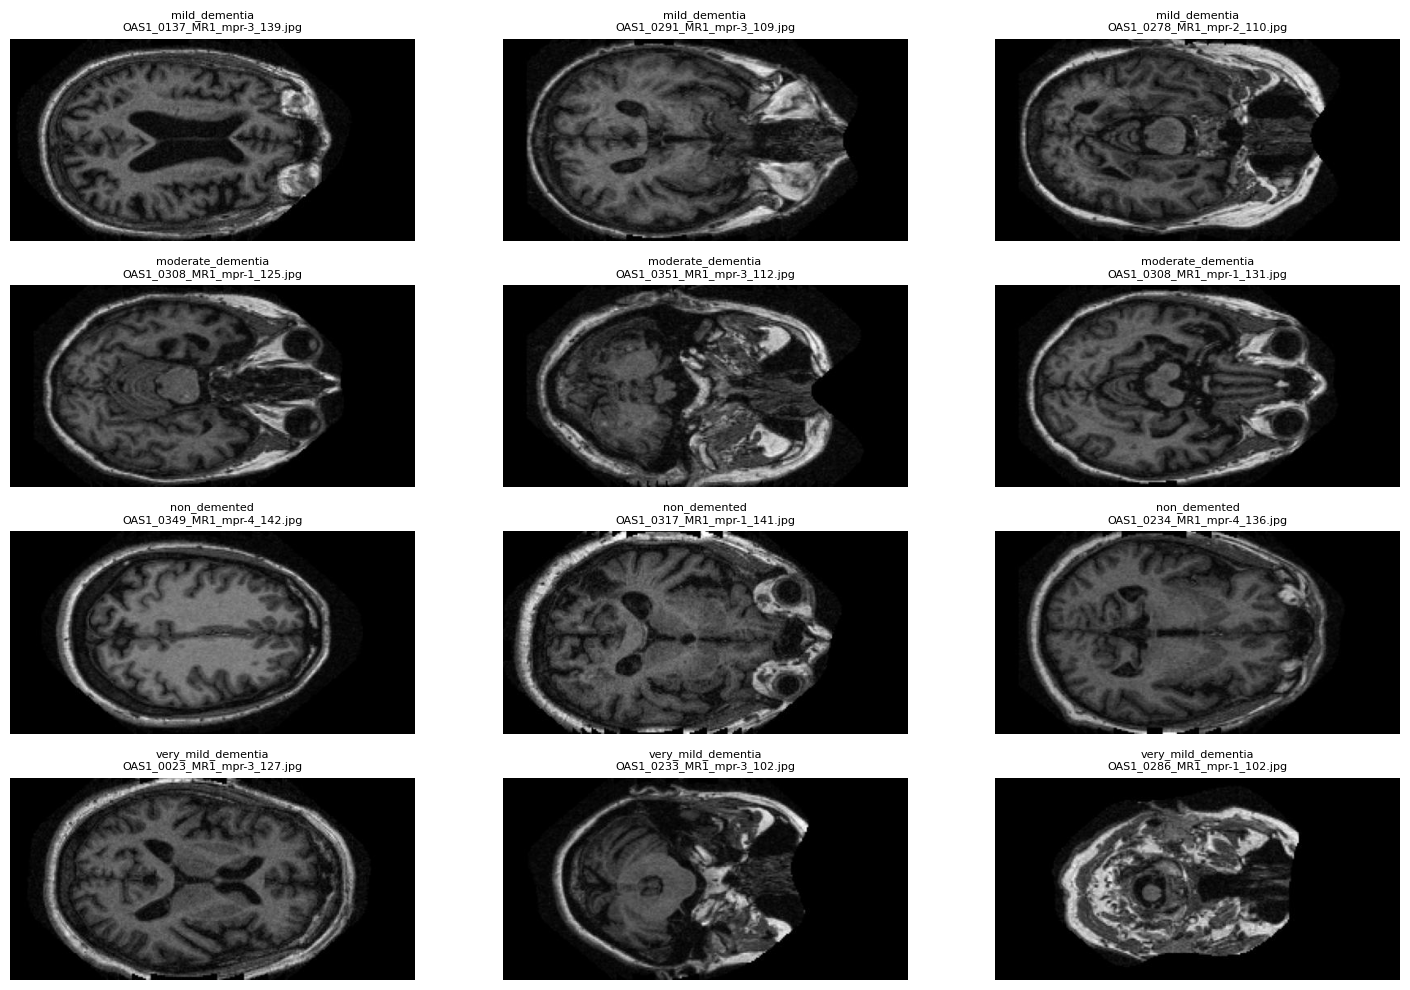


Data setup completed successfully!


In [6]:
try:
    print("Starting data analysis...")
    class_counts = analyze_dataset()
    
    print("\nChecking image dimensions...")
    dimensions = check_image_dimensions()
    
    print("\nVerifying images...")
    verify_images()
    
    print("\nLoading sample images...")
    load_sample_images()
    
    print("\nData setup completed successfully!")
    
except Exception as e:
    print(f"\nError during setup: {str(e)}")

## Interpreting Results

### Class Distribution
- Check for class imbalance
- Note any missing directories
- Verify expected total image count

### Image Dimensions
- Look for outlier dimensions
- Confirm resolution consistency
- Plan resizing strategy if needed

### Invalid Images
If any invalid images are found:
1. Record their paths
2. Investigate corruption causes
3. Consider removal or replacement

### Next Steps
- [ ] Remove or replace invalid images
- [ ] Standardize image dimensions if needed
- [ ] Proceed with preprocessing pipeline